### `지도 학습( Supervised Learning )`

→ 레이블이 지정된 훈련 데이터 기반으로 모델 구축 

- 각 행은 `입력 변수`와 원하는 `대상 변수`로 구성됨
- ex ) 타이타닉 데이터의 성별, 나이, 객실 클래스 → 승객의 생존 여부

 ## 데이터 전처리
훈련 프로세스 시작 전에 데이터를 특정 방식으로 형식화 해야 함 → 전처리( Preprocessing )

In [2]:
import numpy as np
from sklearn import preprocessing

# 샘플 데이터 정의
input_data = np.array([[5.1, -2.9, 3.3],
                        [-1.2, 7.8, 6.1],
                        [3.9, 0.4, 2.1],
                        [7.3, 9.9, -4.5]])

### 이진화 ( binarization )
숫자 값 → boolean 값으로 변환

In [4]:
# 데이터 이진화
# 내장 메서드 사용, 임계값 = 2.1
data_binarized = preprocessing.Binarizer(threshold=2.1).transform(input_data)
print("\nBinarized data:\n", data_binarized)
# 2.1보다 큰 값은 모두 1이 되고 나머지는 모두 0이 됨


Binarized data:
 [[1. 0. 1.]
 [0. 1. 1.]
 [1. 0. 0.]
 [1. 1. 0.]]


### 평균 제거( mean removal )

특성 벡터에서 평균을 제거해 각 특성이 0을 중심으로 분포하도록 → 편향 제거 ( 표준 편차 = 1 )

In [5]:
# 평균과 표준 편차 츌력
print("\nBEFORE:")
print("Mean =", input_data.mean(axis=0))
print("Std deviation =", input_data.std(axis=0))

# 평균 제거
data_scaled = preprocessing.scale(input_data)
print("\nAFTER:")
print("Mean =", data_scaled.mean(axis=0))
print("Std deviation =", data_scaled.std(axis=0))


BEFORE:
Mean = [3.775 3.8   1.75 ]
Std deviation = [3.12039661 5.23593354 3.8894087 ]

AFTER:
Mean = [1.11022302e-16 0.00000000e+00 5.55111512e-17]
Std deviation = [1. 1. 1.]


### 스케일링( Scaling )
여러 특성 사이의 숫자 값 범위가 상당히 다를 때 가중치를 동일하게, 이상치의 중요도가 크지 않도록 스케일링

모든 특성을 0~1처럼 작은 범위로 → `MinMaxScaler` 알고리즘

In [8]:
# 최소-최대 스케일링 
data_scaled_minmax = preprocessing.MinMaxScaler(feature_range=(0, 1)) # 0~1 범위
data_scaled_minmax = data_scaled_minmax.fit_transform(input_data)
print("\nMin max scaled data: \n", data_scaled_minmax) 


Min max scaled data: 
 [[0.74117647 0.         0.73584906]
 [0.         0.8359375  1.        ]
 [0.6        0.2578125  0.62264151]
 [1.         1.         0.        ]]


### 정규화( Normalization )
스케일링은 값 `범위`를 변경하는 반면, 정규화는 데이터 `분포의 모양`을 변경

→ 머신러닝 모델이 잘 작동하려면 특성 값이 정규 분포를 따르는 것이 바람직

In [10]:
# 데이터 정규화
data_normalized_l1 = preprocessing.normalize(input_data, norm='l1')
data_normalized_l2 = preprocessing.normalize(input_data, norm='l2')
print("\nL1 normalized data:\n", data_normalized_l1)
print("\nL1 normalized data:\n", data_normalized_l2)


L1 normalized data:
 [[ 0.45132743 -0.25663717  0.2920354 ]
 [-0.0794702   0.51655629  0.40397351]
 [ 0.609375    0.0625      0.328125  ]
 [ 0.33640553  0.4562212  -0.20737327]]

L1 normalized data:
 [[ 0.75765788 -0.43082507  0.49024922]
 [-0.12030718  0.78199664  0.61156148]
 [ 0.87690281  0.08993875  0.47217844]
 [ 0.55734935  0.75585734 -0.34357152]]


## 레이블 인코딩
많은 알고리즘이 입력으로 숫자 요구 → 단어 레이블을 숫자로 변환하는 프로세스 

In [11]:
# 샘플 입력 레이블
input_labels = ['red', 'black', 'red', 'green', 'black', 'yellow', 'white']

# 레이블 인코더 생성 후 레이블 적용
encoder = preprocessing.LabelEncoder()
encoder.fit(input_labels)

# 매핑 출력
print("\nLabel mapping:")
for i, item in enumerate(encoder.classes_):
	print(item, '->', i)

# 디코딩
encoded_values = [3, 0, 4, 1]
decoded_list = encoder.inverse_transform(encoded_values)
print("\nEnecoded values =", list(encoded_values))
print("Decoded labels =", list(decoded_list))


Label mapping:
black -> 0
green -> 1
red -> 2
white -> 3
yellow -> 4

Enecoded values = [3, 0, 4, 1]
Decoded labels = ['white', 'black', 'yellow', 'green']


## 로지스틱 회귀 분류기

In [14]:
from sklearn import linear_model
import matplotlib.pyplot as plt

def visualize_classifier(classifier, X, y):
	# 메시 그리드에서 사용할 X와 y의 최솟값/최댓값 정의
	min_x, max_x = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
	min_y, max_y = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0
	# 메시 그리드를 그리는 데 사용할 스텝 크기 정의
	mesh_step_size = 0.01

# 2차원 벡터와 레이블로 샘플 입력 데이터 정의
X = np.array([[3.1, 7.2], [4, 6.7], [2.9, 8], [5.1, 4.5], [6, 5], [5.6, 5], [3.3, 0.4], [3.9, 0.9], [2.8, 1], [0.5, 3.4], [1, 4], [0.6, 4.9]])
y = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3])

# 로지스틱 회귀 분류기 생성
classifier = linear_model.LogisticRegression(solver='liblinear', C=1)

# 분류기 훈련
classifier.fit(X, y)

# 성능 시각화
visualize_classifier(classifier, X, y)

## 나이브 베이즈 분류기( Naive Bayes )
Baye’s Theorem 사용해 분류기 구축 → 이벤트와 관련된 다양한 조건에 따라 이벤트 발생 확률 설명

문제 인스턴스( 특성 값의 벡터 )에 클래스 레이블을 할당해 구축

주어진 특성의 값이 다른 특성에 값에 독립임을 가정 = `독립 가정` = 나이브에 해당하는 부분

In [16]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# 입력 파일은 데이터 포함
input_file = 'data_multivar_nb.txt'

# 입력 파일에서 데이터 로드
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]

# 나이브 베이즈 분류기 생성
classifier = GaussianNB()

# 분류기 훈련
classifier.fit(X, y)

# 학습된 데이터의 값 예측
y_pred = classifier.predict(X)

# 분류기 정확도 계산
accuracy = 100.0 * (y == y_pred).sum() / X.shape[0]
print("Accuracy of Naive Bayes classifier =", round(accuracy, 2), "%")

# 분류기 성능 시각화
visualize_classifier(classifier, X, y)

Accuracy of Naive Bayes classifier = 99.75 %


### 데이터 분리 및 교차 검증

In [17]:
# 데이터를 훈련과 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
classifier_new = GaussianNB()
classifier_new.fit(X_train, y_train)
y_test_pred = classifier_new.predict(X_test)

# 정확도 계산
accuracy = 100.0 * (y_test == y_test_pred).sum() / X_test.shape[0]
print("Accuracy of the new classifier =", round(accuracy, 2), "%")

# 분류기 성능 시각화
visualize_classifier(classifier_new, X_test, y_test)

Accuracy of the new classifier = 100.0 %


In [18]:
# 점수화 
num_folds = 3
accuracy_values = cross_val_score(classifier, 
        X, y, scoring='accuracy', cv=num_folds)
print("Accuracy: " + str(round(100*accuracy_values.mean(), 2)) + "%")

precision_values = cross_val_score(classifier, 
        X, y, scoring='precision_weighted', cv=num_folds)
print("Precision: " + str(round(100*precision_values.mean(), 2)) + "%")

recall_values = cross_val_score(classifier, 
        X, y, scoring='recall_weighted', cv=num_folds)
print("Recall: " + str(round(100*recall_values.mean(), 2)) + "%")

f1_values = cross_val_score(classifier, 
        X, y, scoring='f1_weighted', cv=num_folds)
print("F1: " + str(round(100*f1_values.mean(), 2)) + "%")

Accuracy: 99.75%
Precision: 99.76%
Recall: 99.75%
F1: 99.75%


## 컨퓨전 행렬
분류기의 성능을 설명하기 위해 사용하는 그림이나 표를 의미함

행렬의 각 행은 예측된 클래스의 인스턴스, 각 열은 실제 클래스의 인스턴스를 나타냄


- `참 양성 ( true positive )` : 참인 값을 참으로 예측한 샘플
- `참 음성 ( true negative )` : 거짓인 값을 거짓으로 예측한 샘플
- `거짓 양성( false positive )` : 거짓인 값을 참으로 예측한 샘플 (= 1종 오류 )
- `거짓 음성( false negative )` : 참인 값을 거짓으로 예측한 샘플 (= 2종 오류 )

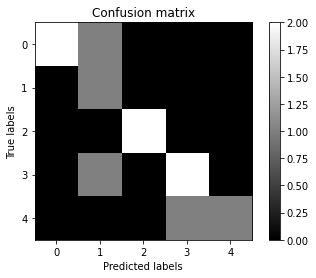


               precision    recall  f1-score   support

     Class-0       1.00      0.67      0.80         3
     Class-1       0.33      1.00      0.50         1
     Class-2       1.00      1.00      1.00         2
     Class-3       0.67      0.67      0.67         3
     Class-4       1.00      0.50      0.67         2

    accuracy                           0.73        11
   macro avg       0.80      0.77      0.73        11
weighted avg       0.85      0.73      0.75        11



In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# 샘플 라벨 생성
true_labels = [2, 0, 0, 2, 4, 4, 1, 0, 3, 3, 3]
pred_labels = [2, 1, 0, 2, 4, 3, 1, 0, 1, 3, 3]

# 컨퓨전 행렬 생성
confusion_mat = confusion_matrix(true_labels, pred_labels)

# 컨퓨전 행렬 시각화 
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.gray)
plt.title('Confusion matrix')
plt.colorbar()
ticks = np.arange(5)
plt.xticks(ticks, ticks)
plt.yticks(ticks, ticks)
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.show()

# 클래스 분류 report
targets = ['Class-0', 'Class-1', 'Class-2', 'Class-3', 'Class-4']
print('\n', classification_report(true_labels, pred_labels, target_names=targets))

## 서포트 벡터 머신 ( SVM ) 
클래스 간의 분리 `초평면( hyperplane; 선의 N차원 버전 … )`을 사용해 정의되는 분류기

레이블이 지정된 훈련 데이터 + 이진 분류 문제

In [23]:
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsOneClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# 데이터를 가져올 Input file 
input_file = 'income_data.txt'

# 데이터 읽어오기
X = []
y = []
count_class1 = 0
count_class2 = 0
max_datapoints = 25000

with open(input_file, 'r') as f:
    # 각 라인 읽어오기 
    for line in f.readlines():
        if count_class1 >= max_datapoints and count_class2 >= max_datapoints:
            break

        if '?' in line:
            continue

        # 각 라인은 쉼표로 분리되어 있음 
        data = line[:-1].split(', ')

        if data[-1] == '<=50K' and count_class1 < max_datapoints:
            X.append(data)
            count_class1 += 1

        if data[-1] == '>50K' and count_class2 < max_datapoints:
            X.append(data)
            count_class2 += 1

# numpy array로 변경 
X = np.array(X)

# 문자열 -> 숫자로 레이블 인코딩 
label_encoder = [] 
X_encoded = np.empty(X.shape)
for i,item in enumerate(X[0]):
    if item.isdigit(): 
        X_encoded[:, i] = X[:, i]
    else:
        label_encoder.append(preprocessing.LabelEncoder())
        X_encoded[:, i] = label_encoder[-1].fit_transform(X[:, i])

X = X_encoded[:, :-1].astype(int)
y = X_encoded[:, -1].astype(int)


# SVM 분류기 인스턴스 생성 
classifier = OneVsOneClassifier(LinearSVC(random_state=0))
# 분류기 학습 
classifier.fit(X, y)


# 교차 검증
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
classifier = OneVsOneClassifier(LinearSVC(random_state=0))
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)

# F1 score 확인 
f1 = cross_val_score(classifier, X, y, scoring='f1_weighted', cv=3)
print("F1 score: " + str(round(100*f1.mean(), 2)) + "%")

# test datapoint의 예측 결과 확인 
input_data = ['37', 'Private', '215646', 'HS-grad', '9', 'Never-married', 'Handlers-cleaners', 'Not-in-family', 'White', 'Male', '0', '0', '40', 'United-States']

# test datapoint 인코딩 
input_data_encoded = [-1] * len(input_data)
count = 0

'''
for i, item in enumerate(input_data):
    if item.isdigit():
        input_data_encoded[i] = int(input_data[i])
    else:
        input_data_encoded[i] = int(label_encoder[count].transform(input_data[i]))
        count += 1 

input_data_encoded = np.array(input_data_encoded)

# encoded datapoint에 대해 예측하고 결과 출력
predicted_class = classifier.predict(input_data_encoded)
print(label_encoder[-1].inverse_transform(predicted_class)[0])
'''

/Users/isdiscodead/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/isdiscodead/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/isdiscodead/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/isdiscodead/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


F1 score: 56.15%


/Users/isdiscodead/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


'\nfor i, item in enumerate(input_data):\n    if item.isdigit():\n        input_data_encoded[i] = int(input_data[i])\n    else:\n        input_data_encoded[i] = int(label_encoder[count].transform(input_data[i]))\n        count += 1 \n\ninput_data_encoded = np.array(input_data_encoded)\n\n# encoded datapoint에 대해 예측하고 결과 출력\npredicted_class = classifier.predict(input_data_encoded)\nprint(label_encoder[-1].inverse_transform(predicted_class)[0])\n'

## 회귀 ( Regression )
입력 변수와 연속 값 실수인 출력 변수 간의 관계를 추정하는 프로세스 → 분류와 대조적

### 단일 변수 회귀 구축

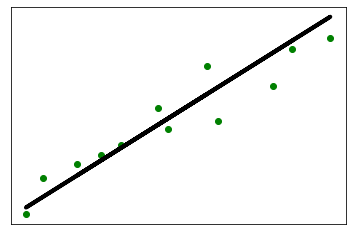

Linear regressor performance:
Mean absolute error = 0.59
Mean squared error = 0.49
Median absolute error = 0.51
Explain variance score = 0.86
R2 score = 0.86

New mean absolute error = 0.59


In [24]:
import pickle

from sklearn import linear_model
import sklearn.metrics as sm

# 데이터를 포함하는 입력 파일
input_file = 'data_singlevar_regr.txt' 

# 데이터 읽기 
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]

# 훈련용 / 테스트용으로 데이터 분할
num_training = int(0.8 * len(X))
num_test = len(X) - num_training

# 훈련 데이터
X_train, y_train = X[:num_training], y[:num_training]

# 테스트 데이터 
X_test, y_test = X[num_training:], y[num_training:]

# 선형 회귀 객체 생성
regressor = linear_model.LinearRegression()

# 훈련 세트를 사용해 모델 훈련
regressor.fit(X_train, y_train)

# 결과 예측
y_test_pred = regressor.predict(X_test)

# 그래프 출력 
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_test_pred, color='black', linewidth=4)
plt.xticks(())
plt.yticks(())
plt.show()

# 성능 지표 계산 
print("Linear regressor performance:")
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2))
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

# 모델 생성 후에 파일로 저장하고 나중에 사용 가능 -> pickle 모듈 
# 모델 유지 
output_model_file = 'model.pkl'

# 모델 저장 
with open(output_model_file, 'wb') as f:
    pickle.dump(regressor, f)

# 모델 불러오기 
with open(output_model_file, 'rb') as f:
    regressor_model = pickle.load(f)

# 테스트 데이터에 대한 예측 수행 
y_test_pred_new = regressor_model.predict(X_test)
print("\nNew mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred_new), 2))

### 다중 변수 회귀 구축